AUC Score: 0.8117426942266572


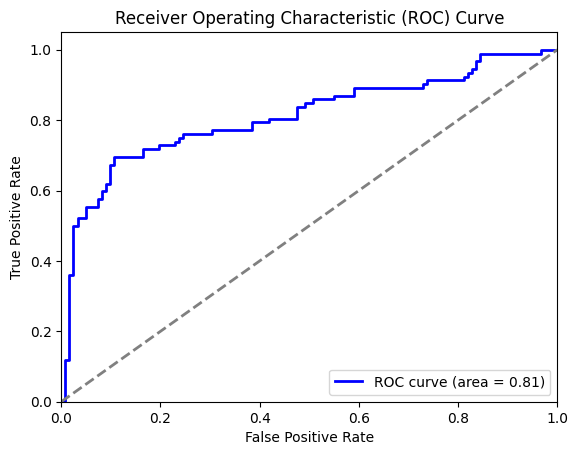

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'V:\Code\My Python Life\Python - College\Semester 5\Data Analytics\Datasets\titanic.csv'
data = pd.read_csv(file_path)

# Preprocess the data
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data = data.dropna()

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Split the data into features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f'AUC Score: {auc_score}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()